#### Name: Sankalp Indish
#### Roll: BEB75
#### Batch: B4
#### Title: Classify the email using the binary classification method. Use K-Nearest Neighbors and Support Vector Machine for classification.
#### Dataset link: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

##### Step 1: Importing the required libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### Step 2: Prepare Data

In [4]:
# Load dataset (already done)
df = pd.read_csv("emails.csv")

# Drop "Email No." as it's just an identifier
df.drop(columns=['Email No.'], inplace=True)

# Features and labels
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Step 3: Train K-Nearest Neighbors

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

##### Step 4: Train Support Vector Machine

In [6]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

##### Step 5: Evaluate Models

In [7]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📌 {model_name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")



📌 K-Nearest Neighbors Results
Accuracy: 0.863768115942029
Confusion Matrix:
[[646  93]
 [ 48 248]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035


📌 Support Vector Machine Results
Accuracy: 0.9594202898550724
Confusion Matrix:
[[715  24]
 [ 18 278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



##### Step 6: Visualize Confusion Matrix

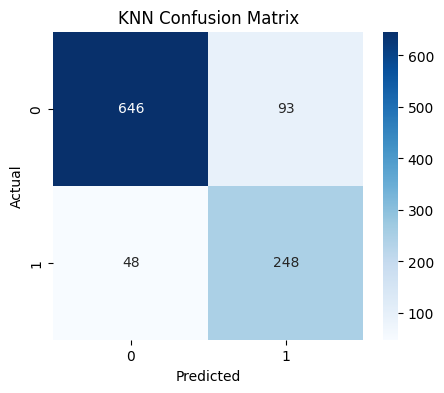

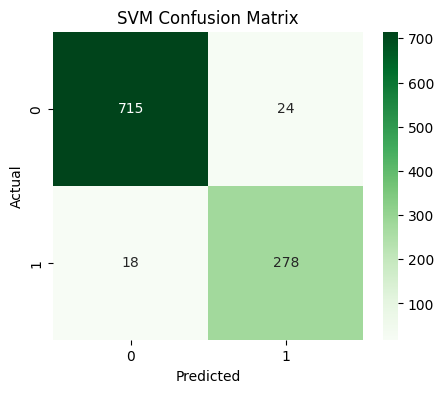

In [8]:
# KNN
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Conclusion**

In this practical, we implemented and compared two supervised machine learning models — **K-Nearest Neighbors (KNN)** and **Support Vector Machine (SVM)** — for binary classification of emails as **Spam** or **Not Spam** using the preprocessed `emails.csv` dataset.

#### 🔹 **Model Performance Summary:**

| Metric           | KNN    | SVM        |
| ---------------- | ------ | ---------- |
| Accuracy         | 86.38% | **95.94%** |
| Precision (Spam) | 73%    | **92%**    |
| Recall (Spam)    | 84%    | **94%**    |
| F1-Score (Spam)  | 78%    | **93%**    |

#### 📌 **Observations:**

* **KNN** gave decent results but struggled with precision and had a higher number of false positives.
* **SVM (linear kernel)** clearly outperformed KNN in all evaluation metrics, showing higher accuracy, precision, and recall.
* This highlights that **SVM is better suited for high-dimensional sparse data** like email text classification.

- Support Vector Machine proved to be the more effective classifier for email spam detection, making it the recommended model for real-world deployment in similar use cases.

In [9]:
# Completed